# 회귀 분석 예제 코드 ( Sikit-Learn)

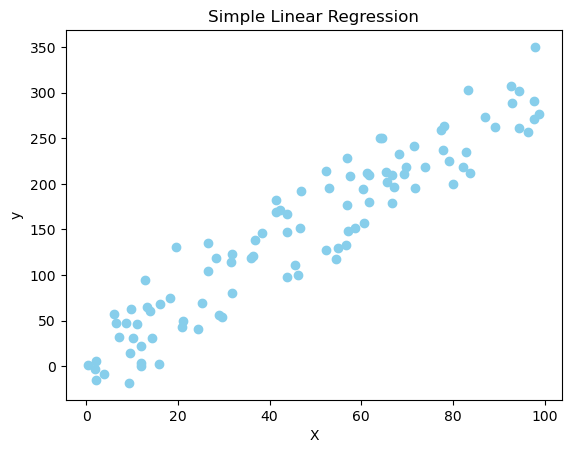

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 가상의 데이터 생성
np.random.seed(0)  # 결과의 일관성을 위해 시드 설정
X = np.random.rand(100, 1) * 100  # 독립 변수 (0~100 사이의 값 100개)
y = 3 * X + np.random.randn(100, 1) * 30  # 종속 변수 (기울기는 3, 잡음 추가)
X_sm = sm.add_constant(X)

# 데이터와 회귀선 시각화
plt.scatter(X, y, color='skyblue')  # 원본 데이터 산점도
plt.title('Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [2]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

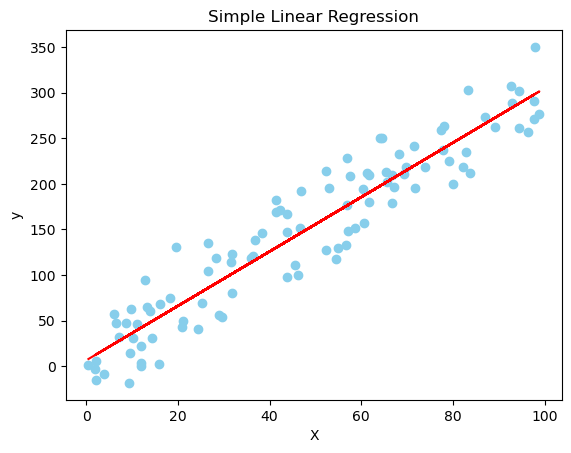

In [3]:
# 예측 및 모델 평가
y_pred = model.predict(X)

# 데이터와 회귀선 시각화
plt.scatter(X, y, color='skyblue')  # 원본 데이터 산점도
plt.plot(X, y_pred, color='red')  # 회귀선
plt.title('Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [4]:
# 상수항 추가
X_sm = sm.add_constant(X)#데이터 시트에 상수항을 추가하는데 사용
# add_constant는 X데이터 절편에 해당하는 상수항을 추가하여 모델이 a값을 추정할 수 있도록 합니다. 
# OLS (Ordinary Least Squares) 모델 생성 및 학습
model = sm.OLS(y, X_sm)#Ordinary Least Squares, 통계학에서 회귀 분석을 수행하는 표준적 방법
# 종속 변수와 하나 이상의 독립변수간의 선형 관계를 추정 
# 잔차(실제값과 예측값 사이의 차이)의 제곱합을 최소화 하여 최적의 회귀선을 찾는것으로 목표 
results = model.fit()

# add_constants

- [add_constants의 역할](add_constants.md)  

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     810.4
Date:                Fri, 12 Sep 2025   Prob (F-statistic):           3.49e-49
Time:                        00:06:44   Log-Likelihood:                -481.63
No. Observations:                 100   AIC:                             967.3
Df Residuals:                      98   BIC:                             972.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6645      5.799      1.149      0.2

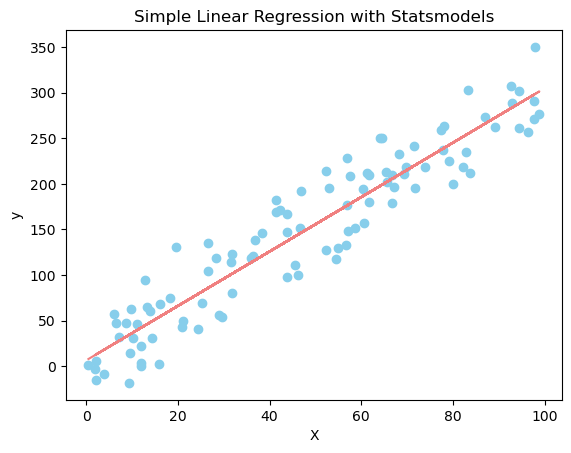

In [5]:
# 요약 결과 출력
print(results.summary()) #summary 함수, 회귀 분석 결과의 다양한 통계적 지표, 모델에 대한 정보를 포괄적으로 보여줌 
# 모델의 정보: 회귀 모델의 종류, 데이터 개수, 사용 된 변수의 수 등 기본적인 모델 정보 제공
# 계수 추정치(Coefficients) : 각 독립 변수의 회귀 계수( Coefficient)값을 보여주며, 변수가 종속 변수에 미치는 영향력을 나타냄
# 모델 적합도(Model fit) : R-squared, Adjusted R-squared, F-statistic, Prob(F-statistic)등의 지표를 통해 모델의 적합도를 나타냄
# 로그 우도(Log-Likelihood) : 모델의 로그-우도 값을 표시, 모델이 관측 된 데이터를 얼마나 잘 설명하는지 나타내는 또다른 지표

# AIC, BIC : Akaike Information Criterion, Bayesian Information Criterion 
# 모델의 복잡도와 적합도를 동시에 고려, 여러 모델을 비교할 떄 유용 

#잔차 분석(Rediuals) : 일부 요약에서는 잔차의 분포와 관련된 정보도 제공할 수 있음. 

# 데이터와 회귀선 시각화
plt.scatter(X, y, color='skyblue')  # 원본 데이터 산점도 (하늘색)
plt.plot(X, results.predict(X_sm), color='lightcoral')  # 회귀선 (밝은 주황색)
plt.title('Simple Linear Regression with Statsmodels')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

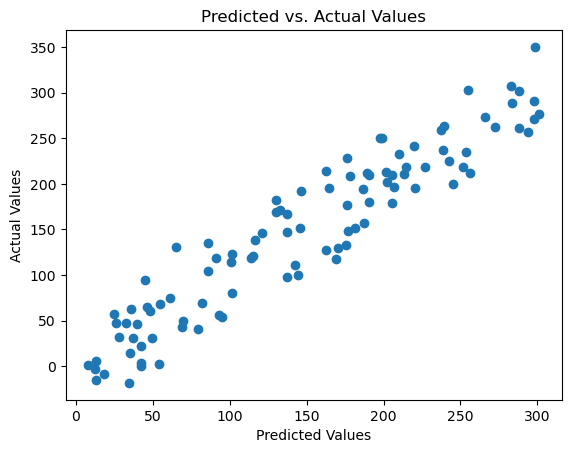

In [6]:
# 선형성 검증 
predicted_values = results.predict(X_sm)
plt.scatter(predicted_values, y)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Predicted vs. Actual Values")
plt.show()

# 오차의 독립성 검증 

- [durbin_watson](./durbin-watson.md). 
  - 더빈 왓슨 통계량 
  - 0~4 사이의 값을 가지며 2근처의 값은 잔차간에 상관관계가 없음을 나타냄 
  - 0에 가까우면 양의 자기 상관 
  - 4에 가까우면 음의 자기 상관 

In [7]:
# 오차의 독립성 검증 
print('Durbin-Watson:', sm.stats.durbin_watson(results.resid), '\n')

Durbin-Watson: 2.0832252321235343 



In [8]:
print(results.summary()) # Durbin-Watson 확인

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     810.4
Date:                Fri, 12 Sep 2025   Prob (F-statistic):           3.49e-49
Time:                        00:11:37   Log-Likelihood:                -481.63
No. Observations:                 100   AIC:                             967.3
Df Residuals:                      98   BIC:                             972.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6645      5.799      1.149      0.2

# 오차의 정규성 검증 

- 통계적 검증
    - `Shapiro-Wilk`
      - 표본 크기가 50 미만일 때 가장 효과적 
      - 통계량(W)는 0과 1사이의 값을 가진다. 
        - 1에 가까울수록 데이터는 정규분포를 잘 따른다는 증거 
        - 0에 가까울수록 데이터는 정규분포를 잘 따르지 않는다는 증거 
    - `Kolmogorov-Smirnov(K-S)`
      - 표본 크기가 50 보다 큰 경우 
      - 0~1사이 검증 값을 가짐 
      - 당신의 데이터가 기대하는 분포(예: 정규분포)와 얼마나 다른지 보여줌 
      - D값이 작으면 정상적인 데이터와 비슷 
      - D값이 크면 정삭적인 데이터와 차이가 크다 

In [9]:
from scipy import stats

# 잔차 계산
residuals = results.resid

# Shapiro-Wilk 테스트
shapiro_test = stats.shapiro(residuals)
print("Shapiro-Wilk Test:\nStatistic:", shapiro_test[0], "\np-Value:", shapiro_test[1])

# Kolmogorov-Smirnov(K-S) 검정
ks_test = stats.kstest(residuals, 'norm')
print("Kolmogorov-Smirnov Test:\nStatistic:", ks_test[0], "\np-Value:", ks_test[1])

Shapiro-Wilk Test:
Statistic: 0.9672574594314467 
p-Value: 0.013686444210492171
Kolmogorov-Smirnov Test:
Statistic: 0.4998424117503809 
p-Value: 1.2575698532038804e-23


- [resid.md](./resid.md)

<Figure size 600x400 with 0 Axes>

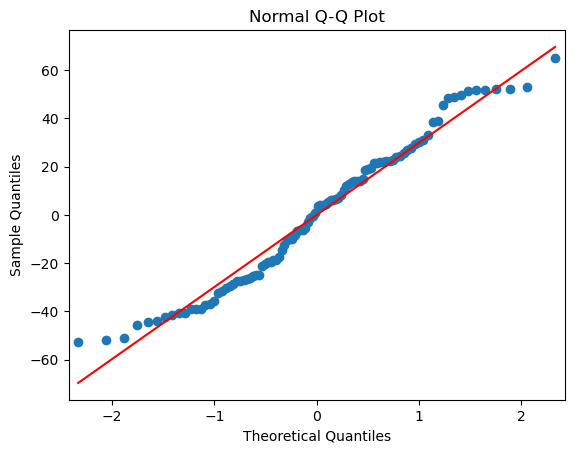

In [10]:
# Q-Q Plot(Quantile-Quantile Plot)
# 샘플 데이터의 분위수와 정규 분포의 분위수를 비교하는 그래프 
# 데이터가 정규 분포를 따른다면 점들이 대략적으로 직선에 가깝게 그려짐 
plt.figure(figsize=(6, 4))
sm.qqplot(residuals, line='s')
plt.title('Normal Q-Q Plot')
plt.show()

In [11]:
from statsmodels.stats.diagnostic import het_breuschpagan, het_goldfeldquandt
# 브루스 파간 검정 ( Breusch-Pagan test )
# 선형 회귀 모델에서 잔차의 등분산성 가정이 유효한지를 검정하는 통계적 방법
#검정 결과를 해석할 때는 통계량 자체보다, 통계량에 대한 p-value가 더 중요 
# p-value <= 0.05 : 통계량이 통계적으로 유의미, 잔차의 이분산성이 존재할 가능성이 높음 
# p-value > 0.05 : 통계량이 통계적으로 유의미하지 않으며, 잔차의 등분산성을 가정하는 것이 타당 
# 잔차 계산
residuals = results.resid

# Breusch-Pagan 테스트
bp_test = het_breuschpagan(residuals, results.model.exog)
print("Breusch-Pagan Test:\nStatistic:", bp_test[0], "\np-Value:", bp_test[1])

Breusch-Pagan Test:
Statistic: 0.037989958447126604 
p-Value: 0.8454633043549428


- [Breusch-Pagan](./breusch-pagan.md). 
- 

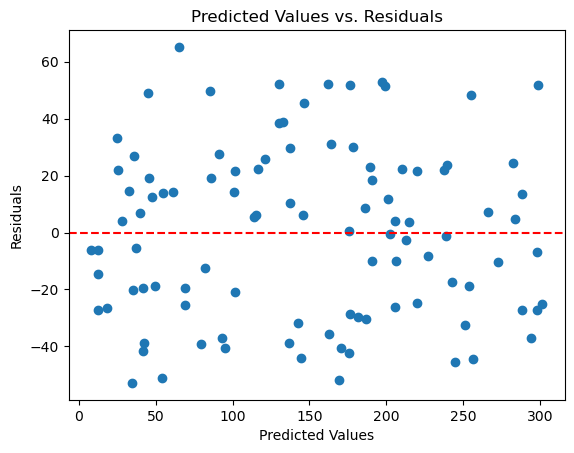

In [12]:
plt.scatter(predicted_values, results.resid)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Predicted Values vs. Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# 다중 공산성 

- 회귀 분석에서 여러 독립변수들이 서로 높은 상관 관계를 가질때, 이들 변수들이 상호 종속적인 관게에 있다고 할 수 있음. 
- 이는 다른 변수들이 다른 변수들의 정보를 중복하여 포함하고 있다는 의미 
- 문제
  - 회귀 분석의 신뢰성이 떨어짐 ( 높을 경우 : 다중 공산성 )
  - 회귀의 추정이 불안정 
  - 작은 데이터의 변화로 모델이 과도하게 반응 
  - 어떤 변수가 결과에 미치는 영향을 정확히 추정하기 힘들어짐 
- 해결 방안
  - PCA(주성분 분석)으로 변수의 수를 줄이거나 
  - 덜 상관관계가 있는 변수들을 선택
  - 릿찌, 라쏘 회귀와 같은 정규화 기법을 사용 

In [13]:
import pandas as pd

# 데이터셋 생성
np.random.seed(0)
X1 = np.random.rand(100) * 10  # 첫 번째 독립 변수
X2 = X1 + np.random.normal(0, 1, 100) * 2  # 두 번째 독립 변수, X1과 강한 상관 관계
X3 = np.random.rand(100) * 10  # 세 번째 독립 변수, 상대적으로 독립적
y = 5 + 2 * X1 + 3 * X2 + 7 * X3 + np.random.normal(0, 2, 100)  # 종속 변수

# DataFrame으로 변환
df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'y': y})
df

,X1,X2,X3,y
0,5.488135,3.157835,2.074701,41.355759
1,7.151894,8.953547,4.246855,77.281908
2,6.027634,6.958959,3.741700,62.672847
3,5.448832,2.376344,4.635754,52.710249
4,4.236548,7.213052,2.776287,51.380386
...,...,...,...,...
95,1.831914,3.195103,3.799270,45.543331
96,5.865129,4.258310,1.811510,40.657468
97,0.201075,-1.178024,7.885455,54.190682
98,8.289400,7.378335,0.568481,50.422235


In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 계산
X = df[['X1', 'X2', 'X3']]
X = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

  feature       VIF
0   const  5.858475
1      X1  3.112313
2      X2  3.218998
3      X3  1.064651


# 분산 팽창 계수 ( Variance Inflation Factor, VIF )

- 회귀 모델에서 독립변수가 다른 독립변수를 얼마나 강하게 연관되어 있는지 나타내는 값 
- $$ VIF = \frac{1}{1 - R^2} $$
- VIF 가 1에 가까우면 다중공산성이 없는 것으로 간주 
- 5이상이면 다중 공산성이 있다고 봄, 추가 조사 필요
- 10이상이면 심각한 다중 공산성이 있음 
- 선형관계만을 고려하기 때문에, 비선형 관계에 대해서 감지 못할 수도 있음